In [3]:
#Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [93]:
bike_df = pd.read_csv('day.csv')
#reading the data
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [94]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [95]:
bike_df.shape

(730, 16)

In [96]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [97]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

- instant is just a row identifier
- dteday is removed as we have other date features columns like mnth and yr and weekday.
- casual and registered variables are not available at the time of prediction. These describe the target variable cnt as sum of these two

In [98]:
bike_df.drop(['instant'],axis=1,inplace=True)

In [99]:
bike_df.drop(['dteday'],axis=1,inplace=True)
bike_df.drop(['casual'],axis=1,inplace=True)
bike_df.drop(['registered'],axis=1,inplace=True)

In [100]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [101]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [102]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [103]:
#gives info about unique values present in data
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### So from the above correlation formed we can clearly see that season,month and weekday which are supposed to be non-numerical are numerical which should be changed 


### Handling outliers

In [104]:
#gives info about unique values present in data
bike_df.nunique() 

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [105]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

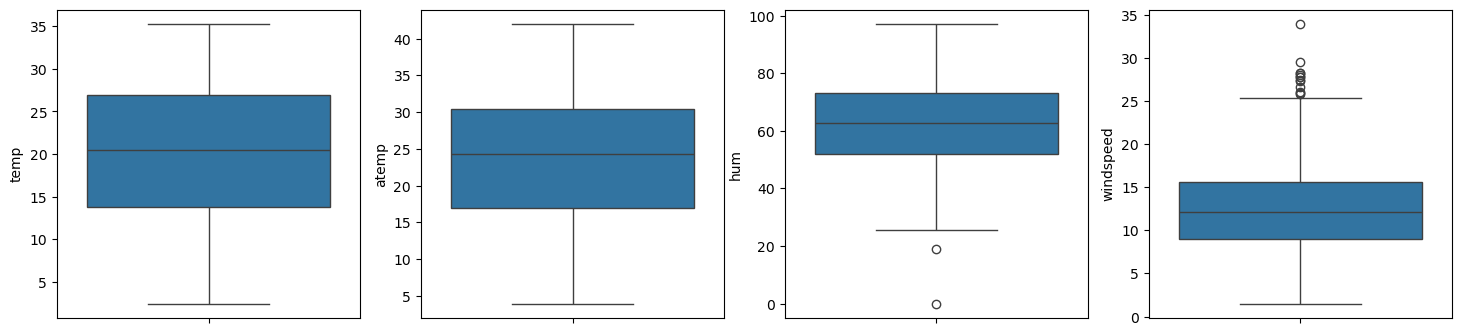

In [106]:
#Draw box plot for independent variables with continous variable
cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize= (18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y = col,data = bike_df)
    i+=1

##### From the above plots it is clear that we don't have any outliers to be handle here

## EDA

In [107]:
#changing categorical data which were primarily numeric to more meaningful one

bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Draw pair plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

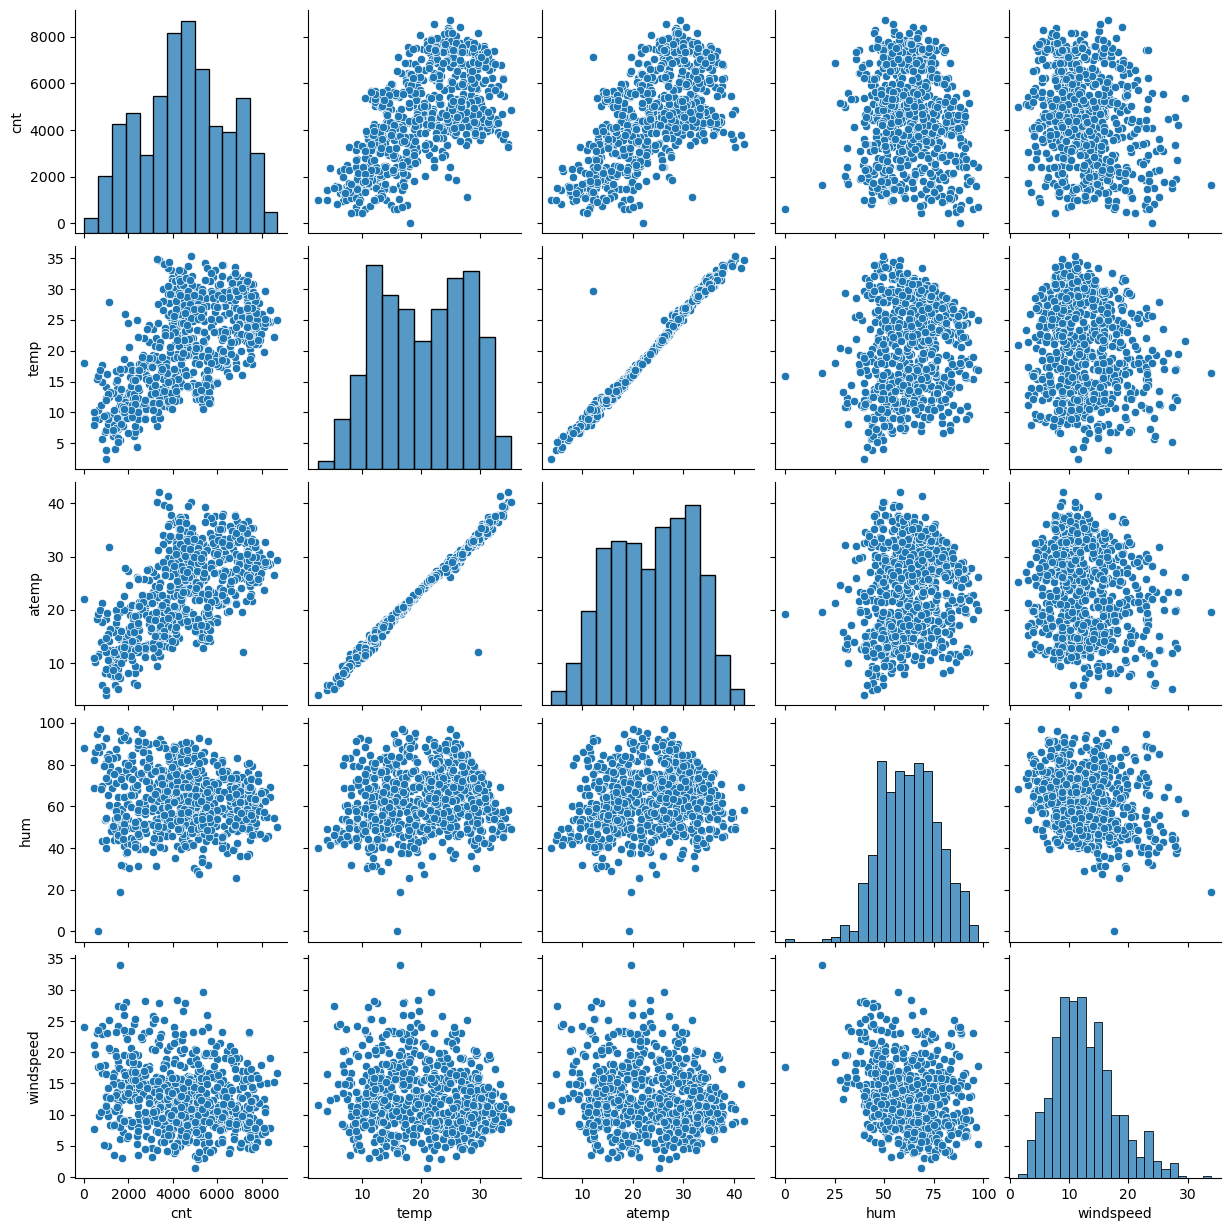

In [108]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation
- And from the plots we can also say that there is alinear relationship between temp and atemp

<Figure size 2000x1500 with 0 Axes>

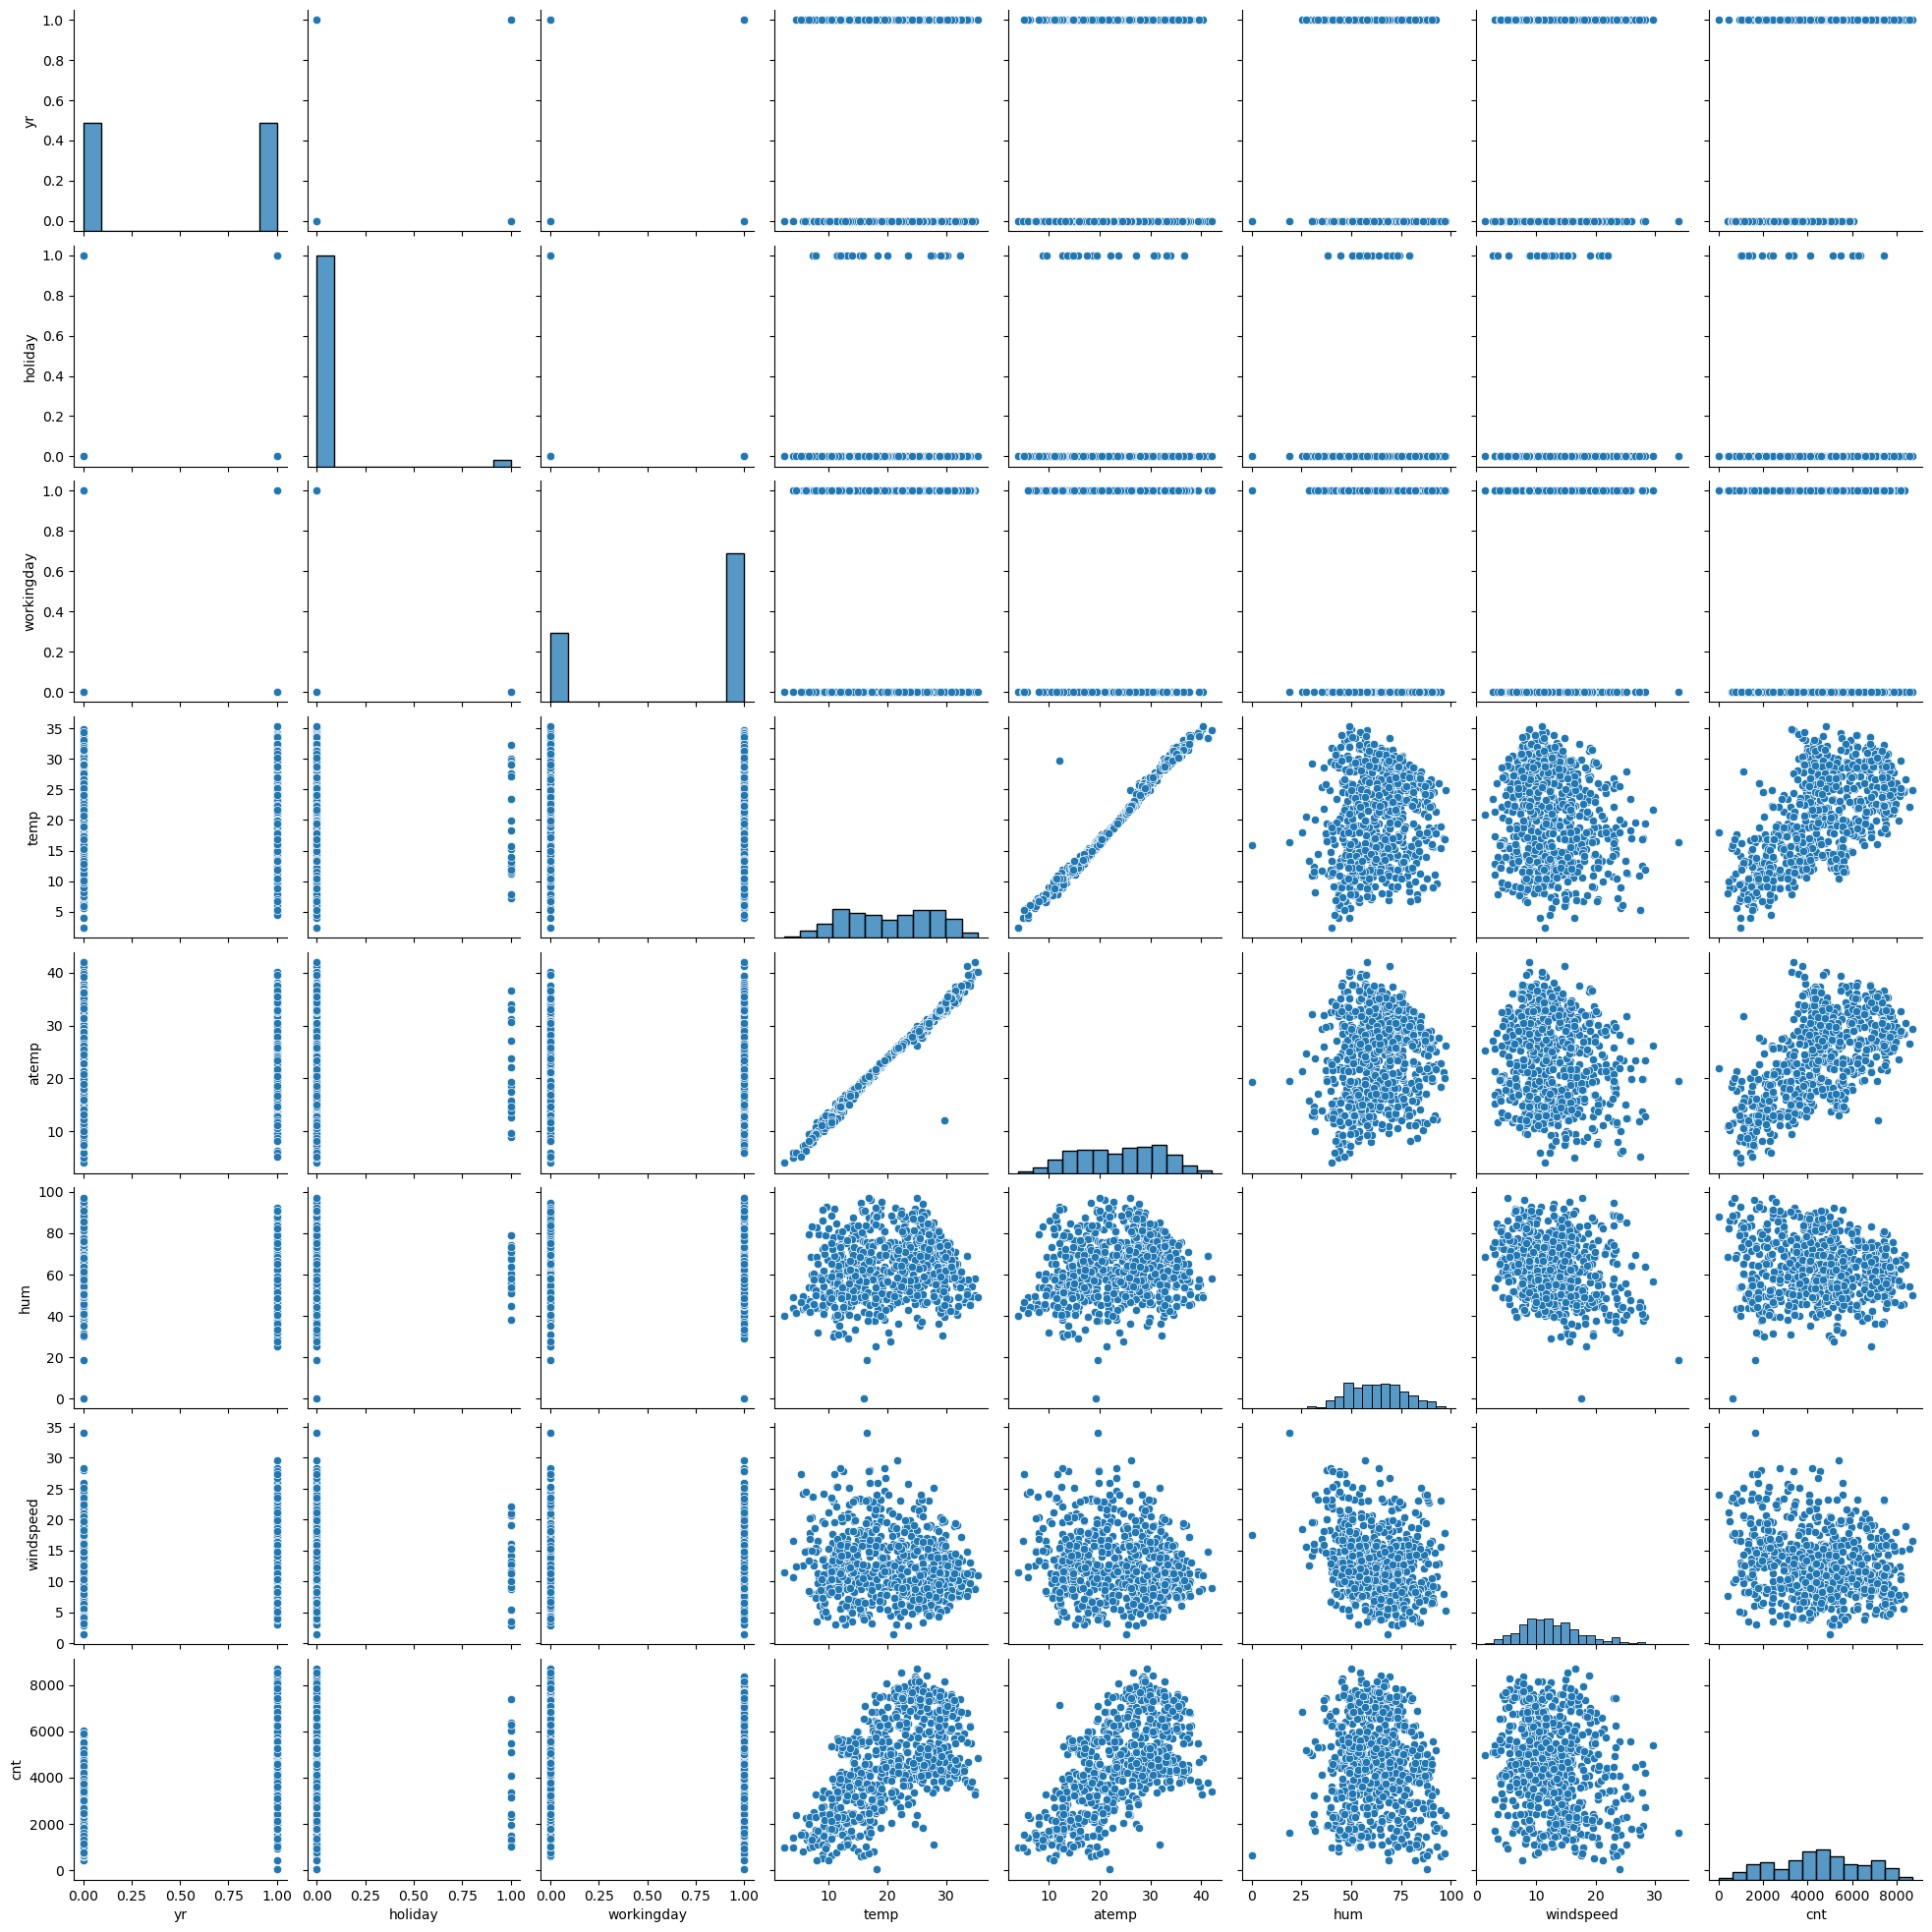

In [109]:
##visualising the data to find the co relation between the numeric variable
plt.figure(figsize = (20,15))
sns.pairplot(bike_df)
plt.show()

### Heatmap for correlation between numeric variables

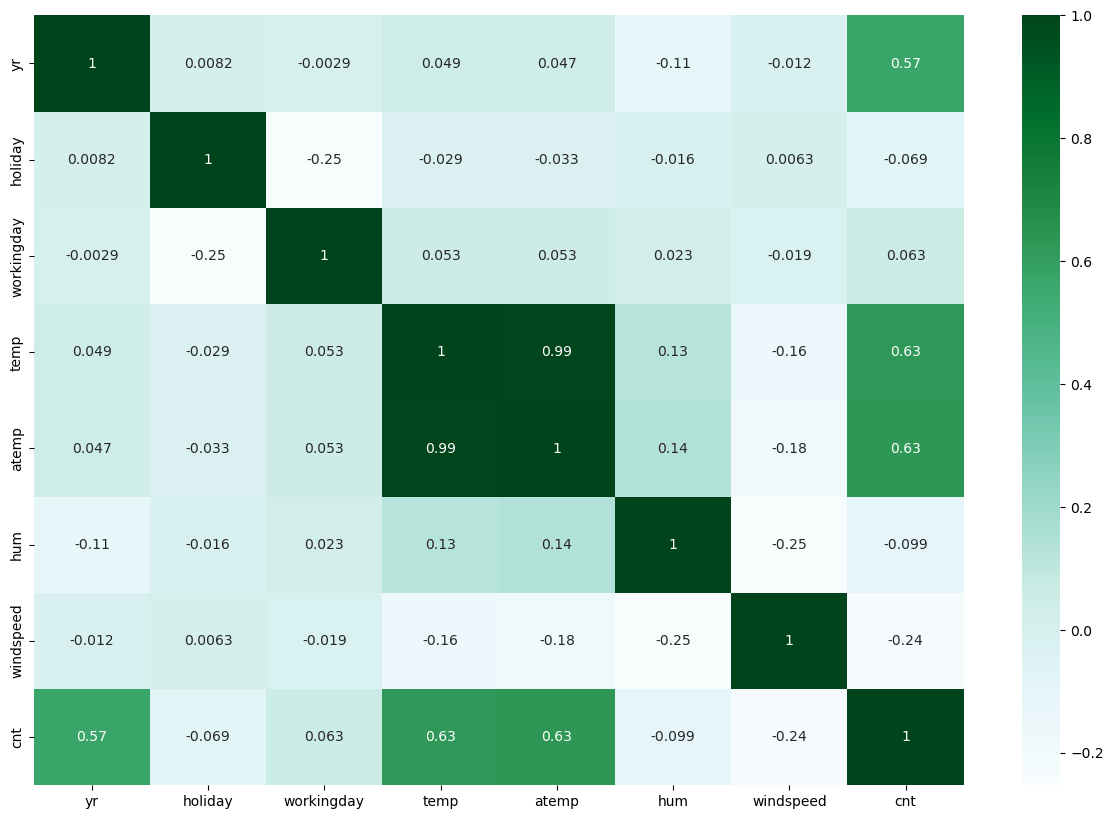

In [110]:
#checking continous variables relationship with each other
plt.figure(figsize=(15,10))
sns.heatmap(bike_df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(),cmap ='BuGn',annot = True)
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

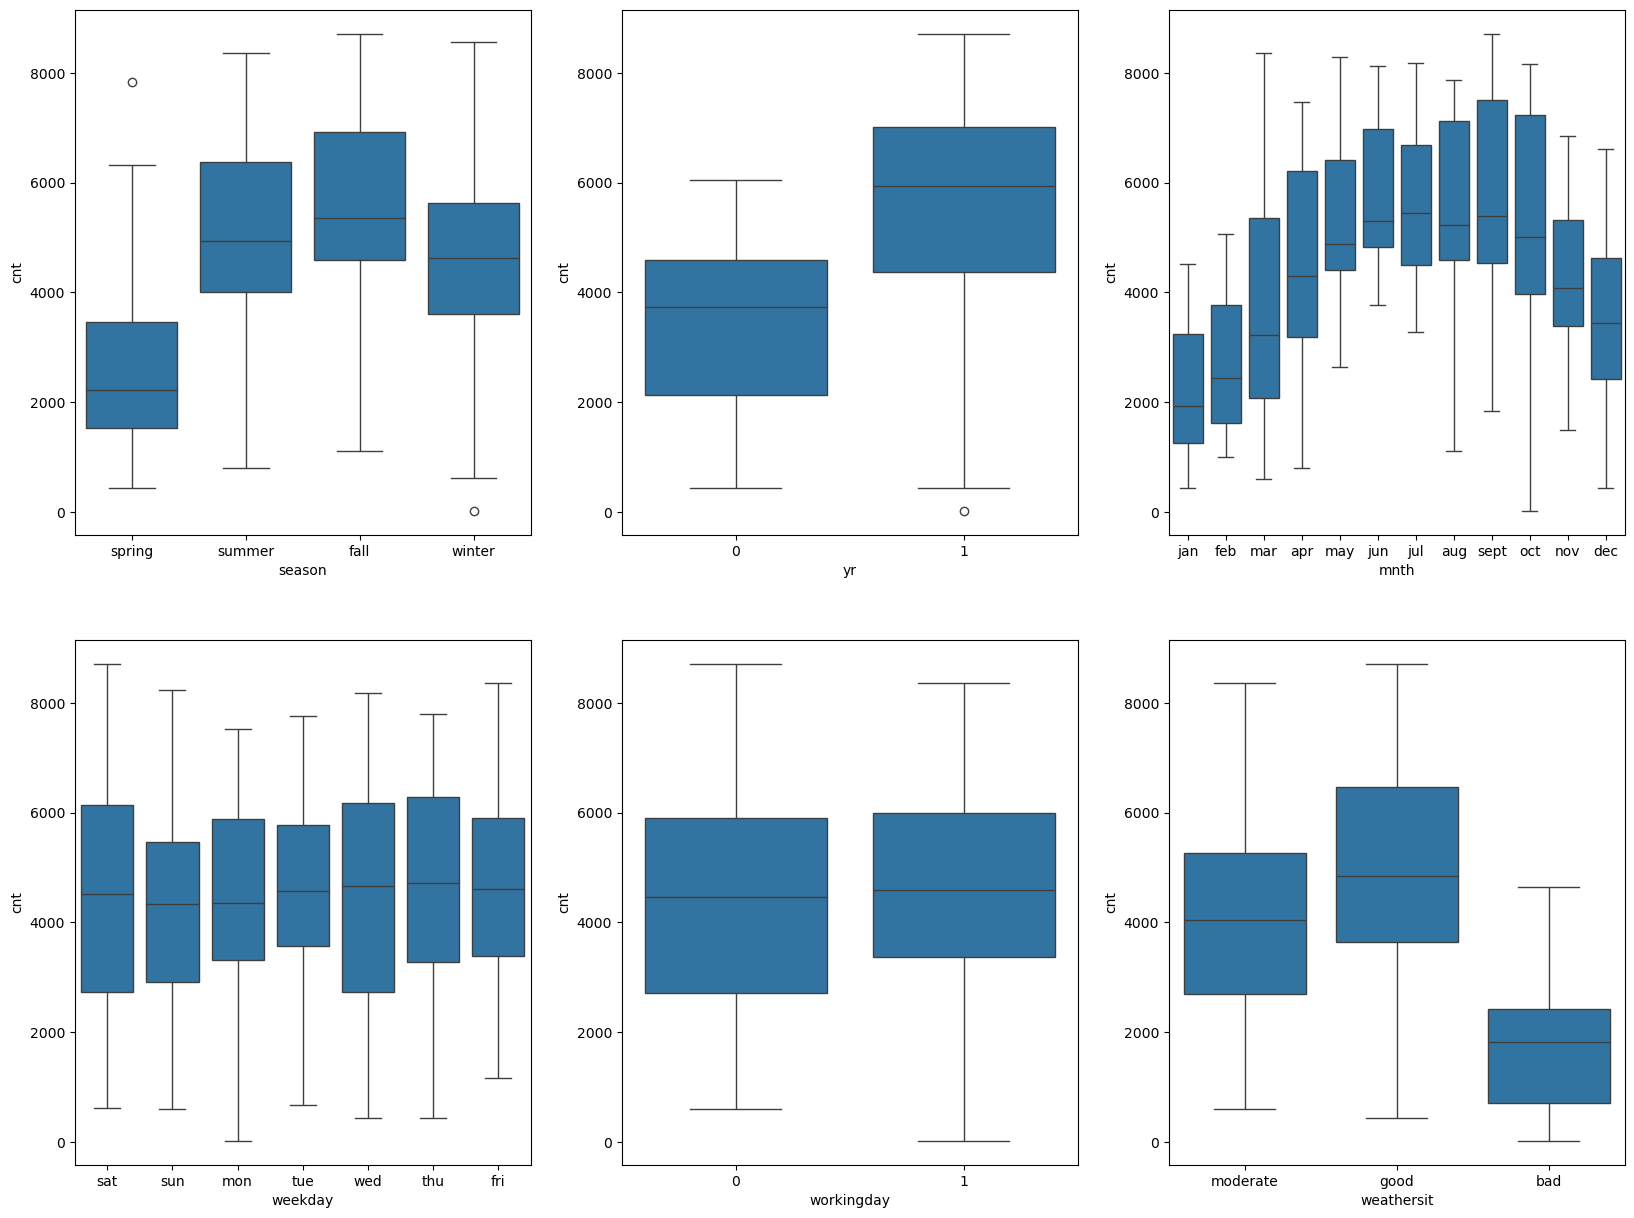

In [111]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)

Here many insights can be drawn from the plots
- season:fall has highest demand for rental bikes
- demand for next year has grown
- Demand is continously growing each month till June.September month has highest demand.After September,demand is decreasing
- When there is a holiday, demand is decreased
- The clear weathersit has highest demand


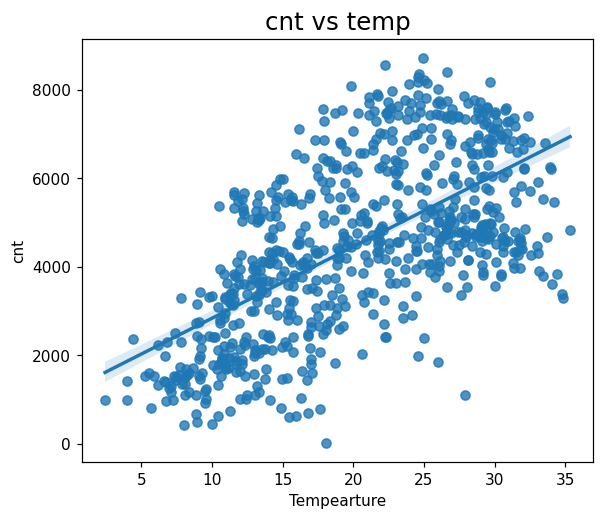

In [112]:
plt.figure(figsize=(6,5),dpi=110)
plt.title('cnt vs temp',fontsize = 16)
sns.regplot(data = bike_df,y = 'cnt', x='temp')
plt.xlabel('Tempearture')
plt.show()

- Demand for bikes is positively correlated to temp
- we can se that is linearly increasing with temp indicating linear relation.

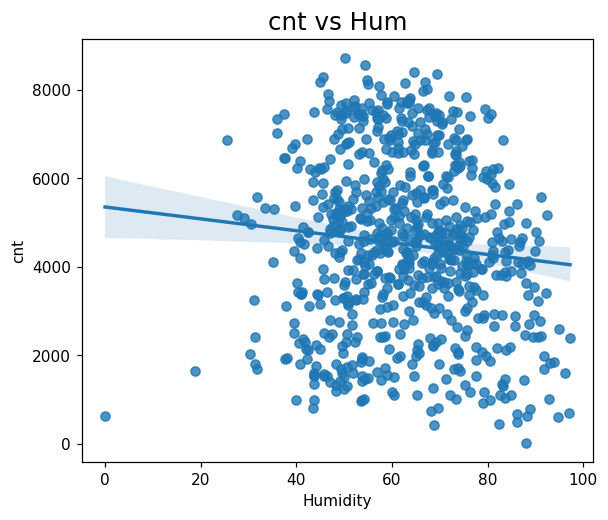

In [113]:
plt.figure(figsize = (6,5),dpi = 110)
plt.title('cnt vs Hum',fontsize = 16)
sns.regplot(data = bike_df, y = 'cnt', x ='hum')
plt.xlabel('Humidity')
plt.show()

- Hum is values are more scattered around
- Although we can see cnt decreasing with increase in humidity

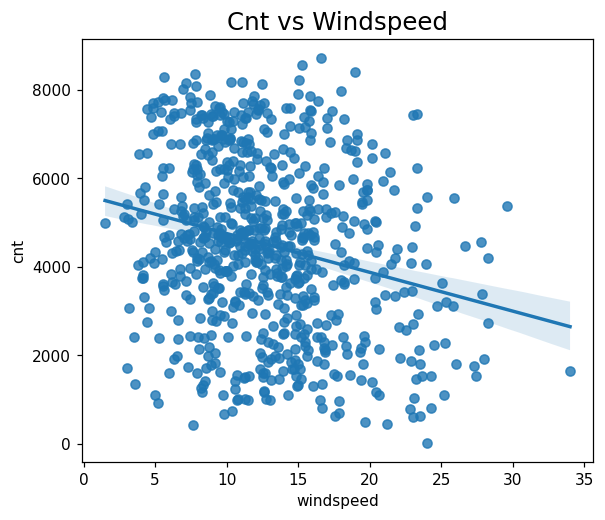

In [114]:
plt.figure(figsize =(6,5),dpi = 110)
plt.title('Cnt vs Windspeed',fontsize = 16)
sns.regplot(data = bike_df, y ='cnt', x = 'windspeed')
plt.show()

- windspeed is values are more scattered around
- Although we can see cnt decreasing with increase in windspeed.

## Data preparation for linar regression

#### Creating dummy variables for categorical variables

In [115]:
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])

In [116]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [117]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,True,False,True,False


## Model Building
### Splitting data into train and test data

In [118]:
bike_df.shape

(730, 31)

In [119]:
#y to contain only target variable
y=bike_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [121]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


## Feature Scaling continous Variables

In [4]:
#Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [123]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [124]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,True,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,False,True,False,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,False,True,False,...,False,True,False,False,False,False,False,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,True,False,False,...,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,False,False,False,False,False,False,True,False,False,True


## Build a model using RFE and Automated approach:

In [126]:
# Build a model using RFE and Automated approach:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [127]:
# Use RFE to reduce the number of features to 15
rfe = RFE(estimator=lr, n_features_to_select=15)

# Fit the RFE model
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [128]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 16),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 14),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [191]:
print(X_train[cols].dtypes)

yr                     int32
season_spring          int32
season_winter          int32
mnth_jul               int32
mnth_sept              int32
weathersit_bad         int32
weathersit_moderate    int32
dtype: object


In [149]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [150]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [151]:
print(X_train[cols].isnull().sum())

yr                     0
holiday                0
workingday             0
temp                   0
hum                    0
windspeed              0
season_spring          0
season_summer          0
season_winter          0
mnth_jan               0
mnth_jul               0
mnth_sept              0
weekday_sat            0
weathersit_bad         0
weathersit_moderate    0
dtype: int64


In [152]:
# Convert bool columns to int
X_train[cols] = X_train[cols].astype(int)
X_train_sm = sm.add_constant(np.asarray(X_train[cols]))

In [192]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train[cols] = X_train[cols].astype(int)
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [193]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [194]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [195]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [196]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [197]:
X_train_rfe.shape

(511, 15)

### Model 1 - start with all variables selected by RFE

In [198]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     122.0
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          2.98e-145
Time:                        16:29:40   Log-Likelihood:                -4226.6
No. Observations:                 511   AIC:                             8481.
Df Residuals:                     497   BIC:                             8541.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4204.6961    

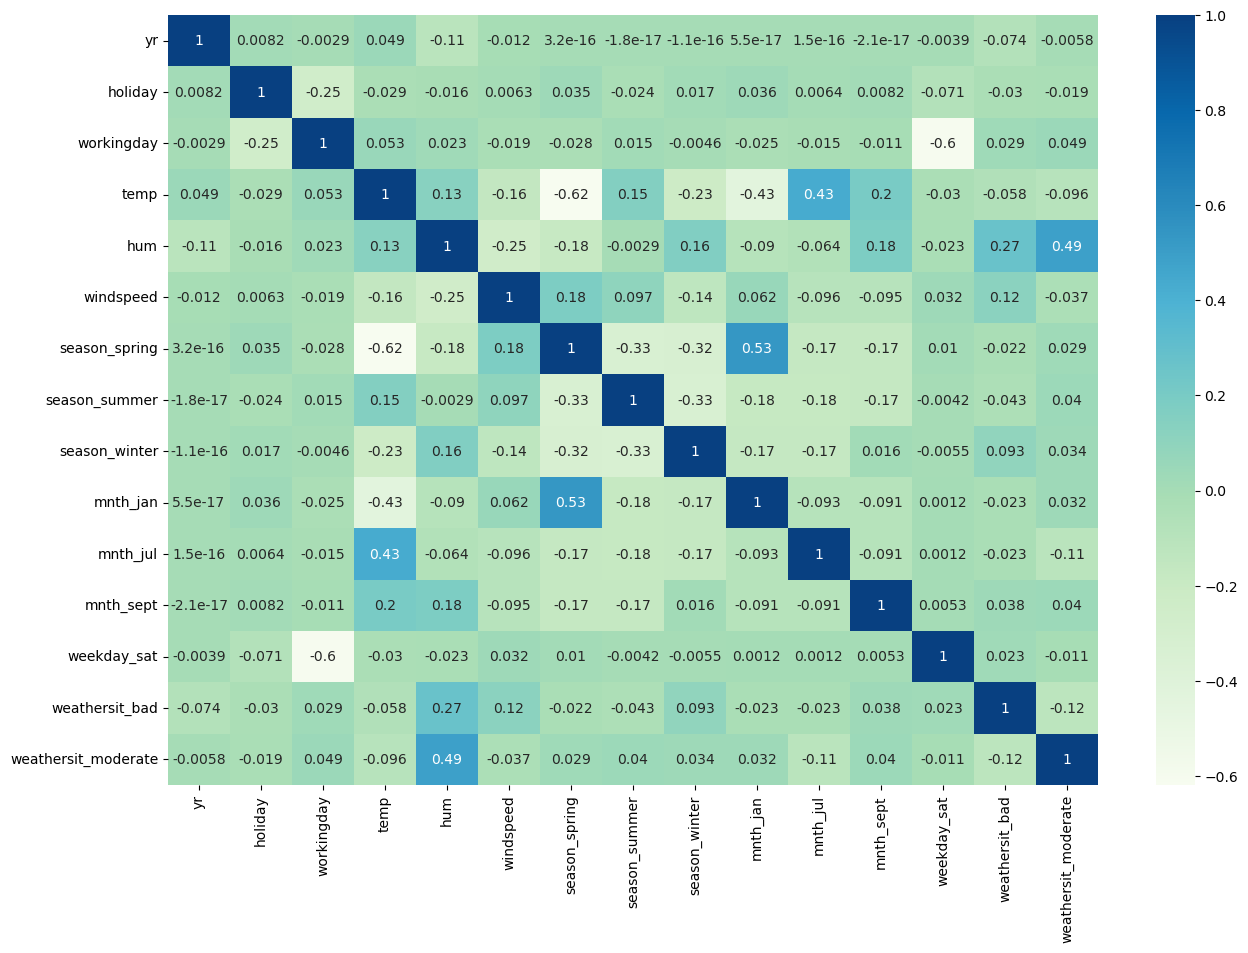

In [199]:
#checking correlation of features selected by RFE with target column.
#Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike_df[['yr','holiday','workingday','temp','hum','windspeed','season_spring','season_summer',
                  'season_winter','mnth_jan','mnth_jul','mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']].corr(),cmap ='GnBu',annot = True)
plt.show()

## Model 2

In [200]:
# Dropping the variable mnth_jul as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     132.3
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          2.99e-146
Time:                        16:29:52   Log-Likelihood:                -4226.8
No. Observations:                 511   AIC:                             8480.
Df Residuals:                     498   BIC:                             8535.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4254.6889    

## Model 3

In [201]:
## Dropping temp and hum

cols = ['yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     132.3
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          2.99e-146
Time:                        16:29:53   Log-Likelihood:                -4226.8
No. Observations:                 511   AIC:                             8480.
Df Residuals:                     498   BIC:                             8535.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4254.6889    

## Model 4

In [202]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     144.1
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          4.65e-147
Time:                        16:29:54   Log-Likelihood:                -4227.4
No. Observations:                 511   AIC:                             8479.
Df Residuals:                     499   BIC:                             8530.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4209.2415    

## Model 5

In [203]:
# Dropping the variable windspeed as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     158.0
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          9.37e-148
Time:                        16:29:55   Log-Likelihood:                -4228.4
No. Observations:                 511   AIC:                             8479.
Df Residuals:                     500   BIC:                             8525.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4214.8186    

## Model 6

In [204]:
#removing of season_summer   
cols = ['yr', 'workingday', 'season_spring','season_winter', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     173.0
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.68e-147
Time:                        16:29:56   Log-Likelihood:                -4231.7
No. Observations:                 511   AIC:                             8483.
Df Residuals:                     501   BIC:                             8526.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4040.6442    

## Model 7

In [205]:
#removing of working_day   
cols = ['yr', 'season_spring','season_winter', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     184.9
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          2.49e-144
Time:                        16:29:57   Log-Likelihood:                -4241.9
No. Observations:                 511   AIC:                             8502.
Df Residuals:                     502   BIC:                             8540.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4461.0940    

## Model 8 

In [206]:
#removing of weekday_sat            
cols = ['yr', 'season_spring','season_winter', 'mnth_jan', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     211.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.67e-145
Time:                        16:29:58   Log-Likelihood:                -4241.9
No. Observations:                 511   AIC:                             8500.
Df Residuals:                     503   BIC:                             8534.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4464.0369    

In [212]:
#adding temp and removed 'season_summer' and 'workingday'

cols = ['yr', 'season_spring','season_winter', 'mnth_jan', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate','weekday_sun']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     191.1
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          5.40e-147
Time:                        16:31:40   Log-Likelihood:                -4235.6
No. Observations:                 511   AIC:                             8489.
Df Residuals:                     502   BIC:                             8527.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4521.8297    

## P values almost zero and VIF is also acceptable 
lets select his model as  final it has all important statistics high (R-square,Adjusted R-squared and F-statistic),along with no insignificant variables and no multi colinear(high VIf) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that are no additional parametrs that can be removed from this model.

In [217]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [218]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

4521.829714056139 [ 2046.44296193 -2479.49764465  -359.10269859  -553.92876573
   816.79862907 -2635.79168075  -734.11432849  -424.04840247]


## Model Evaluation 
### Residual Analysis


In [219]:
y_train_pred = lr.predict(X_train[cols])

In [220]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

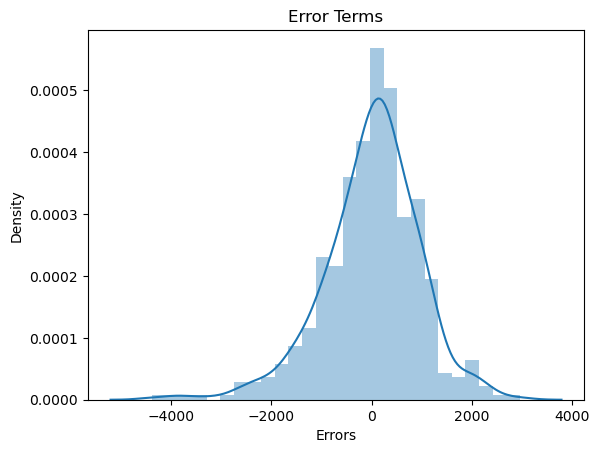

In [221]:
plot_res_dist(y_train, y_train_pred)

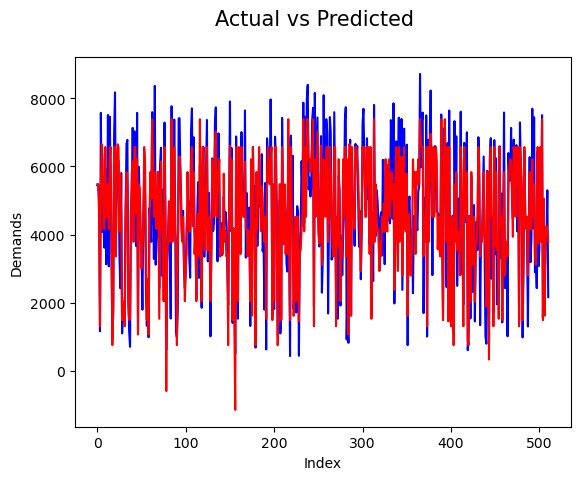

In [222]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

##### Actual and predicted result following almost the same pattern so this model seems ok

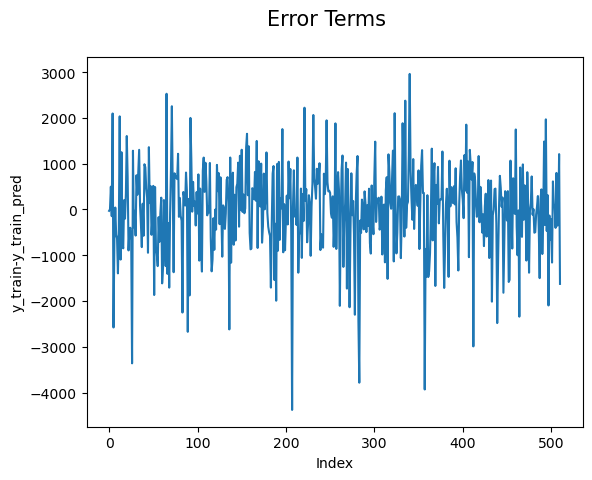

In [224]:
#error terms 
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms',fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

##### Here, if we see the error terms are independent of each other.

### R-Squared value for train predictions

In [226]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7527673262864663

### Prediction of values on test dataset

In [228]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [230]:
cols = ['yr', 'season_spring','season_winter', 'mnth_jan', 'mnth_sept',
       'weathersit_bad', 'weathersit_moderate','weekday_sun']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols])

### R-Squared value for test predictions

In [231]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7369724461594336

##### Inference: R2 same as we obtained for our final model

### Evaluating the model

In [232]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.7369724461594336

Text(0, 0.5, 'y_pred')

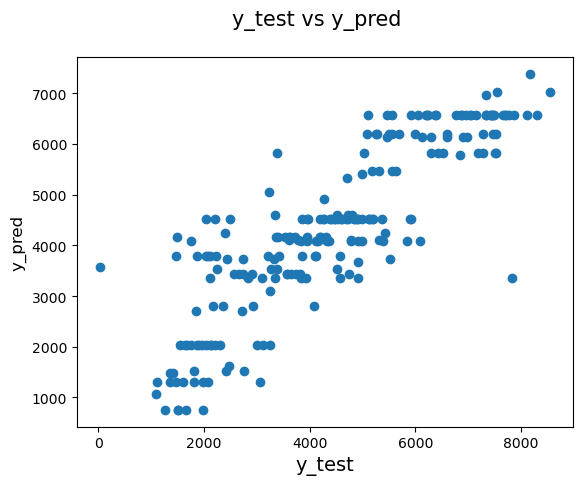

In [233]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [234]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

lm = build_model(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     188.2
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          9.21e-146
Time:                        16:45:02   Log-Likelihood:                -4238.5
No. Observations:                 511   AIC:                             8495.
Df Residuals:                     502   BIC:                             8533.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4459.6229    

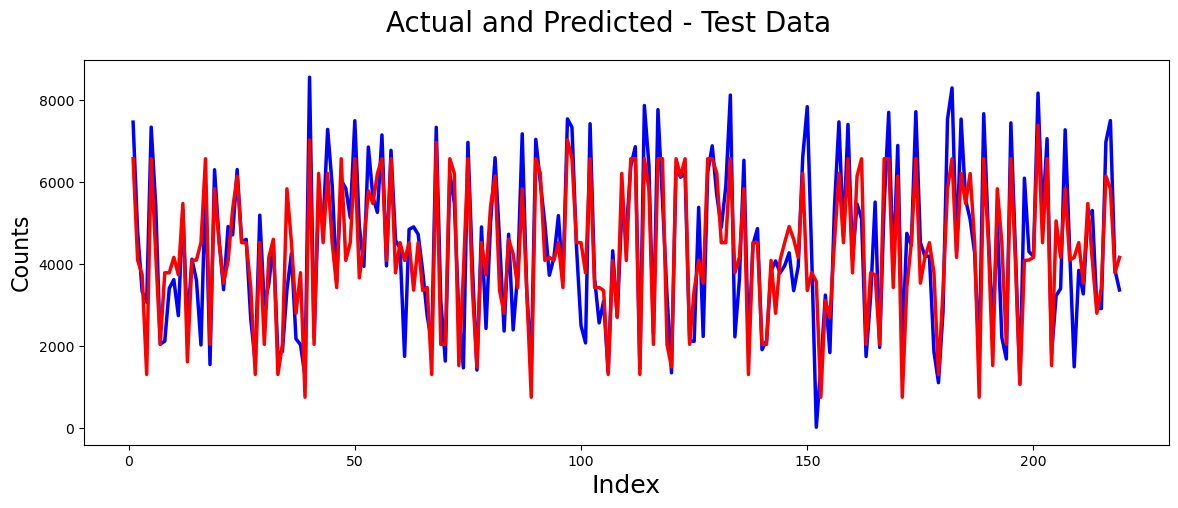

In [240]:
#plot Actual vs Predicted for test data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

By analysing the dataset, The conclusion that company should focus on the following variables to manage the demand:
  
- Season
- months( July, September)
- Year
- Sunday
- weathersit

In [6]:
import statsmodels
print(f'statsmodels version: {statsmodels.__version__}')
import sklearn
print(f'sklearn version: {sklearn.__version__}')
import scipy
print(f'scipy version: {scipy.__version__}')
import plotly
print(f'plotly version: {plotly.__version__}')


statsmodels version: 0.14.0
sklearn version: 1.2.2
scipy version: 1.11.4
plotly version: 5.9.0
